# Customer Churn Analysis

In [2]:
#importing libraries to work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'white')

In [3]:
# reading the data 
df = pd.read_csv("churn_prediction.csv")

In [4]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.shape, df.columns

((28382, 21),
 Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
        'city', 'customer_nw_category', 'branch_code',
        'days_since_last_transaction', 'current_balance',
        'previous_month_end_balance', 'average_monthly_balance_prevQ',
        'average_monthly_balance_prevQ2', 'current_month_credit',
        'previous_month_credit', 'current_month_debit', 'previous_month_debit',
        'current_month_balance', 'previous_month_balance', 'churn'],
       dtype='object'))

In [6]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [8]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [9]:
df.iloc[0,:]

customer_id                                   1
vintage                                    3135
age                                          66
gender                                     Male
dependents                                    0
occupation                        self_employed
city                                        187
customer_nw_category                          2
branch_code                                 755
days_since_last_transaction                 224
current_balance                         1458.71
previous_month_end_balance              1458.71
average_monthly_balance_prevQ           1458.71
average_monthly_balance_prevQ2          1449.07
current_month_credit                        0.2
previous_month_credit                       0.2
current_month_debit                         0.2
previous_month_debit                        0.2
current_month_balance                   1458.71
previous_month_balance                  1458.71
churn                                   

In [10]:
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,...,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


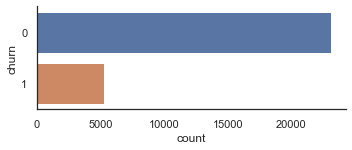

In [11]:
sns.catplot(y = 'churn', kind = 'count', data = df, height= 2, aspect = 2.5);

In [12]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [13]:
df['churn'].value_counts(normalize = True )

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [ ]:
df.dtypes

In [ ]:
numerical_cols = ['customer_id', 'vintage', 'age','dependents','customer_nw_category',
                  'days_since_last_transaction', 'current_balance',
                  'previous_month_end_balance', 'average_monthly_balance_prevQ',
                  'average_monthly_balance_prevQ2', 'current_month_credit',
                  'previous_month_credit', 'current_month_debit', 'previous_month_debit',
                  'current_month_balance', 'previous_month_balance']
df.shape

In [ ]:
df[numerical_cols].describe()

In [ ]:
# features related to balance 
cols = ['current_balance','previous_month_end_balance', 'average_monthly_balance_prevQ',
                  'average_monthly_balance_prevQ2', 'current_month_credit',
                  'previous_month_credit', 'current_month_debit', 'previous_month_debit',
                  'current_month_balance', 'previous_month_balance']

In [ ]:
df[cols].describe()

In [ ]:
df.groupby(['customer_nw_category'])[cols].mean()

In [ ]:
sns.distplot(df['current_month_balance'], kde = False)

In [ ]:
temp = np.log(df['current_month_balance']+6000)

In [ ]:
sns.distplot(temp, kde = False)
plt.show()

In [ ]:
30.5 - 11.13

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(16,6))
xmin = 7
xmax = 16

#current month average 
temp = np.log(df['current_month_balance']+ 6000) # to account for negative values
ax1.set_xlim([xmin,xmax])
ax1.set(xlabel = ' log of average balance of current month')
sns.distplot(temp, kde = False, bins = 100, ax = ax1);

#previous month average balance 
temp = np.log(df['previous_month_balance']+6000)
ax2.set_xlim([xmin, xmax])
ax2.set(xlabel = 'log of average of previous month')
sns.distplot(temp, kde = False, bins = 100, ax = ax2);

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,6))

xmin = 7
xmax = 16

# Current month average

temp = np.log(df['current_month_balance'] + 6000)
ax1.set_xlim([xmin,xmax])
#ax1.set(xlabel ='log of average balance of current month')
sns.distplot(temp, kde = False, bins = 200, ax = ax1)

#Current end of month average balance

temp = np.log(df['current_balance'] + 6000)
ax2.set_xlim([xmin,xmax])
#ax2.set(xlabel = 'Current balance')
sns.distplot(temp, kde = False, bins = 200, ax = ax2)

plt.show()

# Bivariate analysis

In [ ]:
balance_cols = ['current_balance','previous_month_end_balance','current_month_balance', 'previous_month_balance']
df1 = pd.DataFrame()

for i in balance_cols:
    
    df1[str('log_')+ i] = np.log(df[i] +6000)
    
log_balance_cols = df1.columns

In [ ]:
log_balance_cols

In [ ]:
df1['churn'] = df['churn']

In [ ]:
df1_no_churn = df1[df1['churn'] == 0]
sns.pairplot(df1_no_churn, vars= log_balance_cols, plot_kws = {'alpha': 0.1} )
plt.show()

In [ ]:
df1_churn = df1[df1['churn'] == 1]
sns.pairplot(df1_churn, vars = log_balance_cols, plot_kws= {'alpha': 0.1})
plt.show()

In [ ]:
sns.pairplot(df1,vars = log_balance_cols, hue = 'churn', plot_kws = {'alpha': 0.1})
plt.show()